In [8]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

In [13]:
with open('vocab.txt', 'r') as vocabfile:
  vocabcontent = vocabfile.read().split("\n") # string
  
# training data
  
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]
  
  
 
model = Word2Vec(vocabcontent, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for w in vocabcontent:
    X.append(sent_vectorizer(w, model))   
 
print ("========================")
print (X)


/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print(model[model.wv.vocab])
 

print(model.most_similar(positive=['oven'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print(assigned_clusters)
  
  
  
for index, vocab in enumerate(vocabcontent):    
    print(str(assigned_clusters[index]) + ":" + str(vocab))
 
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print("Cluster id labels for inputted data")
print(labels)
print("Centroids data")
print(centroids)
  
print("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print(kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print("Silhouette_score: ")
print(silhouette_score)


[[-0.09351261 -0.02793352  0.13189599 ...  0.08288282  0.08091313
   0.20802574]
 [-0.03892788 -0.01243668  0.05038354 ...  0.02740972  0.02851693
   0.06868316]
 [-0.0311662  -0.00810516  0.04870047 ...  0.03022548  0.03504304
   0.07350279]
 ...
 [-0.00245946  0.00412089 -0.00089898 ... -0.0048915  -0.00374818
  -0.00173464]
 [-0.00159581  0.00155932  0.00342316 ... -0.00232918 -0.00326424
   0.00226386]
 [-0.00045682  0.00171968  0.00041176 ... -0.00110003 -0.00187528
  -0.00385954]]


/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


KeyError: "word 'oven' not in vocabulary"

In [20]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()

KeyboardInterrupt: 

["You've seen better kitchens, but at least this one seems pretty ordinary.", ' You see a fridge.', ' The fridge contains a red onion, a raw pork chop, a red hot pepper, a white onion, a carrot and an orange bell pepper.', ' You can see a closed oven.', ' You make out a table.', ' The table is massive.', ' On the table you can see a cookbook.', ' You can see a counter.', ' The counter is vast.', ' On the counter you can see a red apple, a raw yellow potato, a banana, a raw red potato, a yellow bell pepper, a raw purple potato and a knife.', ' Classic TextWorld.', ' You rest your hand against a wall, but you miss the wall and fall onto a stove.', ' The stove is conventional.', ' However, the stove, like an empty stove, has nothing on it.', ' Sometimes, just sometimes, TextWorld can just be the worst.']
[["You've", 'seen', 'better', 'kitchens,', 'but', 'at', 'least', 'this', 'one', 'seems', 'pretty', 'ordinary.'], ['You', 'see', 'a', 'fridge.'], ['The', 'fridge', 'contains', 'a', 'red', 

/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


1 ["You've", 'seen', 'better', 'kitchens,', 'but', 'at', 'least', 'this', 'one', 'seems', 'pretty', 'ordinary.']
0 ['You', 'see', 'a', 'fridge.']
0 ['The', 'fridge', 'contains', 'a', 'red', 'onion,', 'a', 'raw', 'pork', 'chop,', 'a', 'red', 'hot', 'pepper,', 'a', 'white', 'onion,', 'a', 'carrot', 'and', 'an', 'orange', 'bell', 'pepper.']
0 ['You', 'can', 'see', 'a', 'closed', 'oven.']
0 ['You', 'make', 'out', 'a', 'table.']
1 ['The', 'table', 'is', 'massive.']
0 ['On', 'the', 'table', 'you', 'can', 'see', 'a', 'cookbook.']
0 ['You', 'can', 'see', 'a', 'counter.']
1 ['The', 'counter', 'is', 'vast.']
0 ['On', 'the', 'counter', 'you', 'can', 'see', 'a', 'red', 'apple,', 'a', 'raw', 'yellow', 'potato,', 'a', 'banana,', 'a', 'raw', 'red', 'potato,', 'a', 'yellow', 'bell', 'pepper,', 'a', 'raw', 'purple', 'potato', 'and', 'a', 'knife.']
1 ['Classic', 'TextWorld.']
0 ['You', 'rest', 'your', 'hand', 'against', 'a', 'wall,', 'but', 'you', 'miss', 'the', 'wall', 'and', 'fall', 'onto', 'a', 'stov

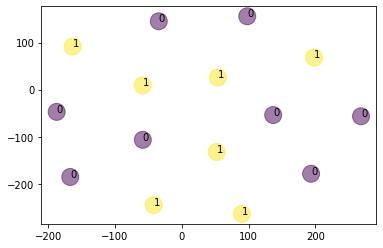

In [24]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
  
# training data

description = "You've seen better kitchens, but at least this one seems pretty ordinary. You see a fridge. The fridge contains a red onion, a raw pork chop, a red hot pepper, a white onion, a carrot and an orange bell pepper. You can see a closed oven. You make out a table. The table is massive. On the table you can see a cookbook. You can see a counter. The counter is vast. On the counter you can see a red apple, a raw yellow potato, a banana, a raw red potato, a yellow bell pepper, a raw purple potato and a knife. Classic TextWorld. You rest your hand against a wall, but you miss the wall and fall onto a stove. The stove is conventional. However, the stove, like an empty stove, has nothing on it. Sometimes, just sometimes, TextWorld can just be the worst."

sentences = []
while description.find('.') != -1:
    index = description.find('.')
    sentences.append(description[:index+1])
    description = description[index+1:]

print(sentences)

word_matrix = []
for sentence in sentences:
    word_matrix.append(sentence.strip().split(' '))

print(word_matrix)
  
 
model = Word2Vec(word_matrix, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in word_matrix:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)
 
 
  
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])
 
 

#print(model.most_similar(positive=['kitchen'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(word_matrix):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))
 
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 
 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(word_matrix)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  word_matrix[j]))
 
 
plt.show()